# Simulating orbits with REBOUND

https://rebound.readthedocs.io/en/latest/api/

Note: because we are using an older version of rebound that is compatible with Noteable, the webpages will not always contain relevant documentation. For specific documentation on a function, use help(), e.g., help(rebound.OrbitPlot)



In [1]:
pip install rebound==3.28.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import rebound
from IPython import display

To run an N-body simulation, we need to create a simulation object first. We will also choose units that are convenient for astronomy.

In [3]:
sim = rebound.Simulation()
sim.units = ('AU','yr','Msun')
sim.G = 39.476926408897626

Then, we add bodies to the simulation. We will star with the star (1.5 solar masses) add then planets in the system from the inside out. Six parameters are required to uniquely specify the orbit of each planet of mass m, and we will use the following observationally determined ones:
 - semi-major axis (a) in au
 - eccentricity (e)
 - inclination (i) in radians
 - PA of the ascending node (Ω) in radians
 - argument of periastron (ω) in radians
 - mean anomaly at a reference epoch (MA_ref) in radians
 

In [4]:
# Central star HR 8799 A
#sim.add(m=1e-6)                
sim.add(m=1.50)                

# co-planar orbits
dtor = np.pi / 180
inc_pl = 27.8 * dtor
Omega_pl = 60.1 * dtor

# planet masses
mass_e = 5e-3
mass_d = mass_e

# add inner most planet: HR 8799 e
sim.add(m=mass_e, a=16.64, e=0.1397, omega=118.8*dtor, M=1.261, inc=inc_pl, Omega=Omega_pl)
# add next planet: HR 8799 d
sim.add(m=mass_d, a=26.29, e=0.1112, omega=24.3*dtor, M=2.032, inc=inc_pl, Omega=Omega_pl)

# compute and print orbital elements of each planet
print()
print("      a (au)          e       omega (deg)  inc (deg)    Omega (deg)")
for o in sim.calculate_orbits(): 
    print("%12.4f %12.4f %12.4f %12.4f %12.4f " % (o.a, o.e, o.omega/dtor, o.inc/dtor, o.Omega/dtor))


      a (au)          e       omega (deg)  inc (deg)    Omega (deg)
     16.6400       0.1397     118.8000      27.8000      60.1000 
     26.2900       0.1112      24.3000      27.8000      60.1000 


Now let's set the time steps for numerical integration. A general rule of thumb is that time steps should be at most 10% of the shortest orbital period. The following will compute all orbital elements for our simlated particles and print out their periods. We then select an appropriate time step.

In [5]:
# compute and print orbital period of each planet
print("   P (yr) ")
for o in sim.calculate_orbits(): 
    print("%9.3f" % o.P)

# set the time step
sim.dt = 1.0

   P (yr) 
   55.331
  109.700


We want to work in the center-of-mass frame throughout this simulation. Now that we have set up some planets we can do that. Let's look at the positions of the host star and two planets before integrating our simulation forward. Are their distances from the origin about where we expect them?

In [6]:
# move to center of mass frame
sim.move_to_com()

# examine initial locations of particles
print("   X (au)    Y (au)    Z (au) ")
for p in sim.particles:
    print("%9.3f %9.3f %9.3f" % (p.x,p.y,p.z))

   X (au)    Y (au)    Z (au) 
    0.079     0.103    -0.009
   -1.495   -15.694    -3.442
  -22.322   -15.261     6.191


For fun, let's plot what the orbits we've specified look like and where our planets are to start out with. We'll also save this first timestep so that we can return to it later.

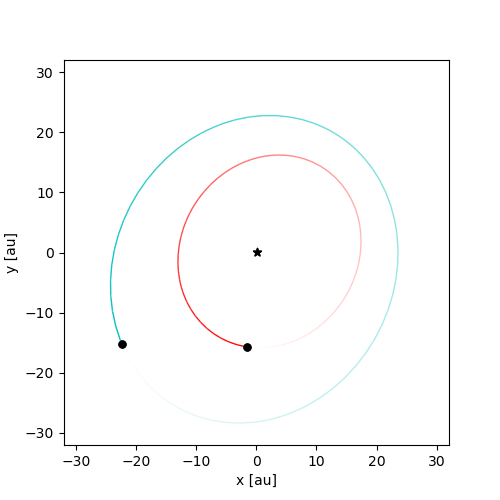

In [7]:
# plot our starting point
op = rebound.OrbitPlot(sim, color=True, periastron=False, unitlabel="[au]",xlim=[-32,32.],ylim=[-32,32.])

# save our starting point
sim.save("start.bin")

Now let's actually integrate the orbits forward. The code below will iteratively integrate more and more time, stopping occasionally to display where the planets are at. Feel free to play with the number of frames and the time between displaying frames

Note: once you've run this block once, the simulation will always pick up where you left off. It won't start from the initial conditions. This is good if you want to keep exploring farther and farther in time, but bad if you want to re-run the experiment to check numbers.

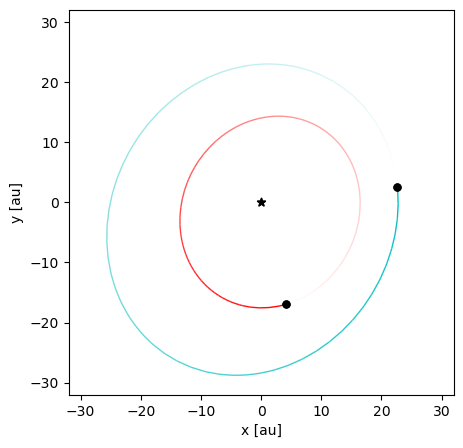

In [12]:
nframe = 220        # at home, I found that frames render at a rate of 10 per second
framestep = sim.dt  

fig = op.fig
for i in range(nframe):
    op.sim.integrate(sim.t + framestep) # timestep the sim
    display.display(plt.gcf())          # start to...
    display.clear_output(wait=True)     # ...clean up old plot
    op.update()                         # update plot data

Let's see if the orbital elements of the planets have changed. In a stable system, they should only change negligibly with time.

In [13]:
# check time run so far
sim.status(showAllFields=False)

# move to center of mass frame
sim.move_to_com()

# compute and print orbital elements of each planet
print()
print("      a (au)          e       omega (deg)  inc (deg)    Omega (deg)")
for o in sim.calculate_orbits(): 
    print("%12.4f %12.4f %12.4f %12.4f %12.4f " % (o.a, o.e, o.omega/dtor, o.inc/dtor, o.Omega/dtor))

---------------------------------
REBOUND version:     	3.28.4
REBOUND built on:    	Oct 20 2023 17:24:23
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	7.2000000000000000e+02
Current timestep:    	1.000000
---------------------------------
<rebound.particle.Particle object at 0x7f4d7e7047a0, m=1.5 x=-0.0935267891636009 y=0.041686099591661224 z=0.053703672813241066 vx=-0.004071174755894309 vy=-0.006943386328570025 vz=3.590252771820695e-05>
<rebound.particle.Particle object at 0x7f4d7e704830, m=0.005 x=5.583957654511006 y=-16.48253795514802 z=-6.884205633563199 vx=1.4505399972685171 vy=0.5769467485237814 vz=-0.511353138108212>
<rebound.particle.Particle object at 0x7f4d7e7047a0, m=0.005 x=22.474079094568573 y=3.976708077649927 z=-9.226896210408924 vx=-0.22918757050022534 vy=1.5060691500472265 vz=0.5005823797927502>
---------------------------------

      a (au)          e       omega (deg)  inc (deg)    Omega (deg)
     16.4927       0.1559      74.8356      

There are actually two more (known) planets in the HR 8799 system. So let's go ahead and return to our original time step and add those in.

In [14]:
# reset sim
del sim
sim = rebound.Simulation("start.bin")

# planet masses
mass_c = mass_e # all 3 inner planets have same mass
mass_b = 3e-3   # outermost planet is less massive

# add third planet: HR 8799 c
sim.add(m=mass_c, a=43.12, e=0.0561, omega=28.5*dtor, M=4.232, inc=inc_pl, Omega=Omega_pl)
# add outer most planet: HR 8799 b
sim.add(m=mass_b, a=70.50, e=0.0113, omega=213.6*dtor, M=2.642, inc=inc_pl, Omega=Omega_pl)

# move to center of mass frame
sim.move_to_com()

# verify the reset
sim.status(showAllFields=False)

# compute and print orbital elements of each planet
print()
print("      a (au)          e       omega (deg)  inc (deg)    Omega (deg)")
for o in sim.calculate_orbits(): 
    print("%12.4f %12.4f %12.4f %12.4f %12.4f " % (o.a, o.e, o.omega/dtor, o.inc/dtor, o.Omega/dtor))

---------------------------------
REBOUND version:     	3.28.4
REBOUND built on:    	Oct 20 2023 17:24:23
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	1.000000
---------------------------------
<rebound.particle.Particle object at 0x7f4d7e7047a0, m=1.5 x=-0.08601052489003369 y=0.05009831148480151 z=0.05247918880877085 vx=-0.007894407743755666 vy=0.0009906727450220013 vz=0.0038686115064337483>
<rebound.particle.Particle object at 0x7f4d7e704830, m=0.005 x=-1.6599408347471287 y=-15.74663059281168 z=-3.3798758555960426 vx=1.7096727450262574 vy=-0.25869130922962563 vz=-0.849417787860531>
<rebound.particle.Particle object at 0x7f4d7e7047a0, m=0.005 x=-22.48723909720716 y=-15.314447978592684 z=6.253094951842233 vx=0.5042477054269283 vy=-1.20751521326713 vz=-0.5478353640954631>
<rebound.particle.Particle object at 0x7f4d7e704830, m=0.005 x=31.981426325924506 y=-22.58483791182247 z=-20.553330101607727 vx=0.59687170148405

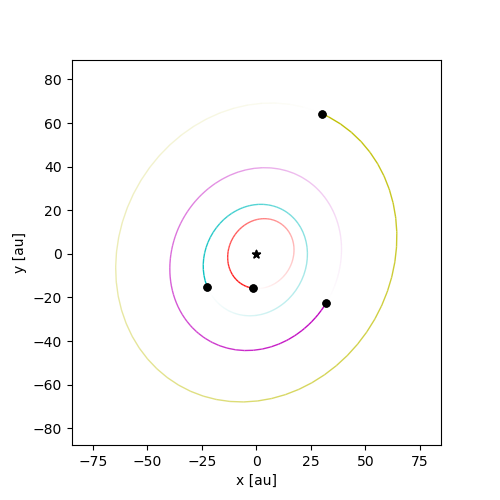

In [11]:
op = rebound.OrbitPlot(sim, color=True, periastron=False, unitlabel="[au]")

Now let's run a long integration and then see how it looks at the end. (You can try running for as long as you like!)

In [15]:
# run simulation
sim.integrate(100000)

# compute and print orbital elements of each planet
print()
print("      a (au)          e       omega (deg)  inc (deg)    Omega (deg)")
for o in sim.calculate_orbits(): 
    print("%12.4f %12.4f %12.4f %12.4f %12.4f " % (o.a, o.e, o.omega/dtor, o.inc/dtor, o.Omega/dtor))


      a (au)          e       omega (deg)  inc (deg)    Omega (deg)
     16.6011       0.1268     240.0454      27.8000      60.1000 
     26.5685       0.1147     141.8462      27.8000      60.1000 
     42.7765       0.0330     318.3331      27.8000      60.1000 
     70.2771       0.0068      90.1207      27.8000      60.1000 


Now let's consider the motion of the star with respect to the barycentre by zooming in on it and looking at its motion.

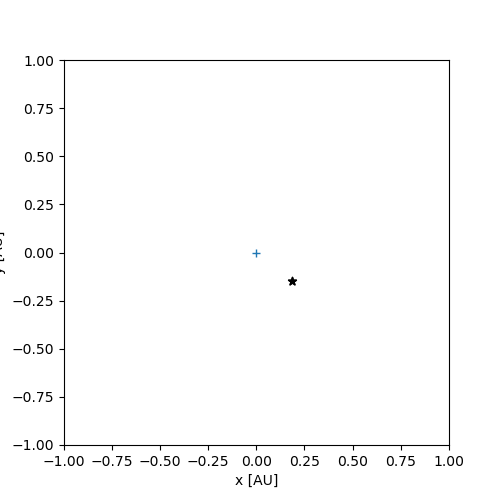

In [44]:
op = rebound.OrbitPlot(sim,color=True,unitlabel="[AU]",xlim=[-1,1],ylim=[-1,1],orbit_style="solid")
plt.plot(0,0,'+',data=None) 

nframe = 220
framestep = 1*sim.dt

fig = op.fig
for i in range(nframe):
    op.sim.integrate(sim.t + framestep) # timestep the sim
    display.display(plt.gcf())          # start to...
    display.clear_output(wait=True)     # ...clean up old plot
    op.update()                         # update plot data

Finally, let's completely reimagine the system by assigning them the same orbital parameters but higher masses. Play with increasing the masses until you start to see dynamical instabilities show up in the animation. Based on their luminosities, we expect e, d, and c to all be about the same mass, and b is expected to be a bit lower.

In [48]:
# reset sim
del sim
sim = rebound.Simulation()

# Central star HR 8799 A
sim.add(m=1.50)                

# planet masses
mass_e = 5e-3 # adjust this mass
mass_d = mass_e
mass_c = mass_e
mass_b = mass_e * 0.5

sim.add(m=mass_e, a=16.64, e=0.1397, omega=118.8*dtor, M=1.261, inc=inc_pl, Omega=Omega_pl)
sim.add(m=mass_d, a=26.29, e=0.1112, omega=24.3*dtor, M=2.032, inc=inc_pl, Omega=Omega_pl)
sim.add(m=mass_c, a=43.12, e=0.0561, omega=28.5*dtor, M=4.232, inc=inc_pl, Omega=Omega_pl)
sim.add(m=mass_b, a=70.50, e=0.0113, omega=213.6*dtor, M=2.642, inc=inc_pl, Omega=Omega_pl)

sim.move_to_com()

After setting the planet masses, run the simulation for a large number of steps. Note that if the system disintegrates early in the time specified, it will slow down the simulation greatly. So if it seems to taking forever, then start over with either lower masses or shorter time.

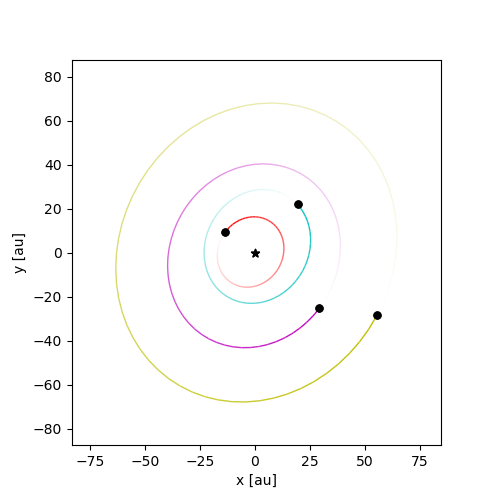

In [49]:
# run simulation
sim.integrate(1000000)

# plot endpoint
op = rebound.OrbitPlot(sim, color=True, periastron=False, unitlabel="[au]")

In [50]:
# use this for reporting the final state of your simulation
sim.status(showAllFields=False)

---------------------------------
REBOUND version:     	3.28.4
REBOUND built on:    	Oct 20 2023 17:24:23
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+06
Current timestep:    	6.579659
---------------------------------
<rebound.particle.Particle object at 0x7f4d7d0230b0, m=1.5 x=-0.2090546379087297 y=0.02645197115238614 z=0.10250327964503123 vx=0.00048651633866616205 vy=-0.0004534945792698773 vz=-0.0003415572241942197>
<rebound.particle.Particle object at 0x7f4d7d022e70, m=0.005 x=-13.454499503021587 y=9.548442849698107 z=8.659099488901266 vx=-0.16190759176601427 vy=-0.21461527491289267 vz=0.017596157093834844>
<rebound.particle.Particle object at 0x7f4d7d0230b0, m=0.005 x=19.29961710674142 y=21.957749749844478 z=-3.0501405284233547 vx=-0.12844933232931344 vy=0.13984053967896354 vz=0.09546269020053835>
<rebound.particle.Particle object at 0x7f4d7d022e70, m=0.005 x=29.151301152820263 y=-25.286086343229204 z=-19.96973474516025 vx=0.1102325